# Zomato Project

## Questions to answer
## 1)What type of restaurant do the majority of customers order from?
## 2) How many votes has each type of restaurant received from customers?
## 3)What are the ratings that the majority of restaurants have received?
## 4)Zomato has observed that most couples order most of their food online. What is their
## average spending on each order?
## 5)Which mode (online or offline) has received the maximum rating?
## 6)Which type of restaurant received more offline orders, so that Zomato can provide those
## customers with some good offers?



# Importing libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns

In [51]:
import matplotlib.pyplot as pit

## Create dataframe

In [22]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [24]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## converting data type of rate to float and remove denominator

In [33]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe)



                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

## Summary of dataframe

In [36]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## no null values in dataframe

# Question 1

Text(0.5, 0, 'Type of Restaurant')

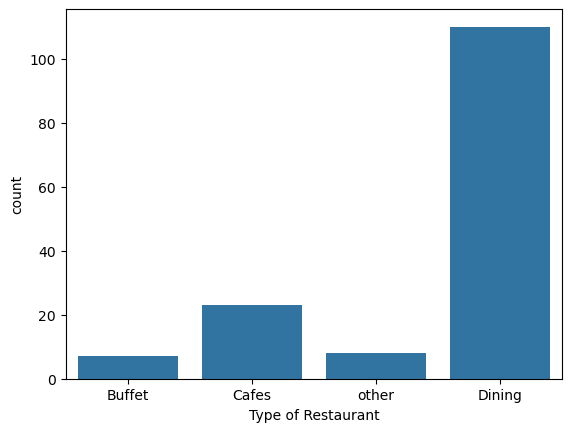

In [40]:
sns.countplot(x=dataframe['listed_in(type)'])
pit.xlabel("Type of Restaurant")

## dining restaurant is the most preferred type

Text(0, 0.5, 'Votes')

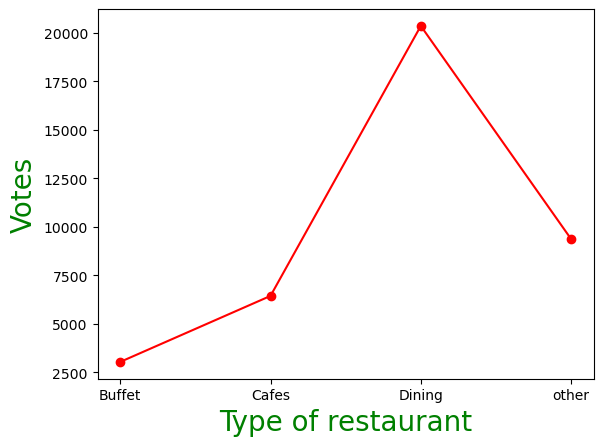

In [53]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
pit.plot(result, c="red", marker="o")
pit.xlabel("Type of restaurant",c="green",size=20)
pit.ylabel("Votes",c="green",size=20)

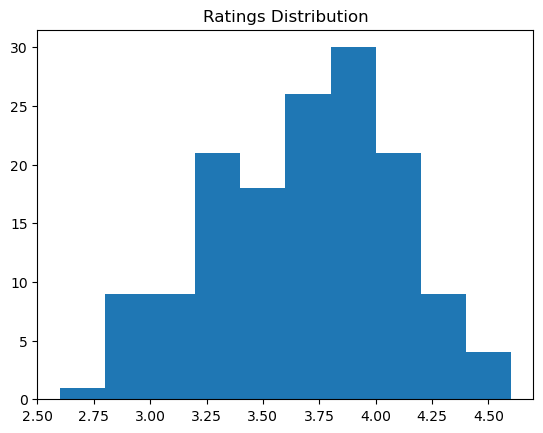

In [59]:
pit.hist(dataframe['rate'],bins=10)
pit.title("Ratings Distribution")
pit.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

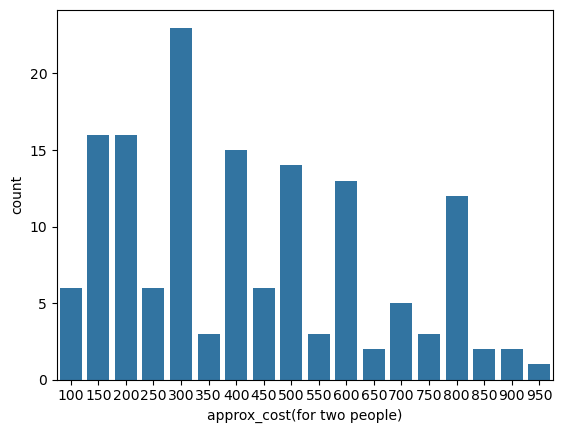

In [57]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

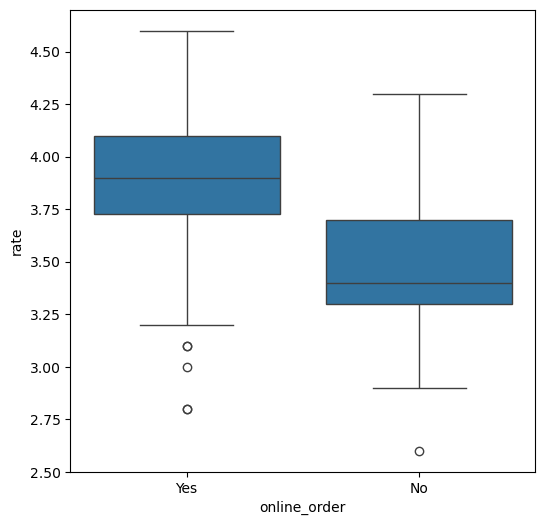

In [67]:
pit.figure(figsize=(6,6))
sns.boxplot(x='online_order', y ='rate', data = dataframe)

In [69]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


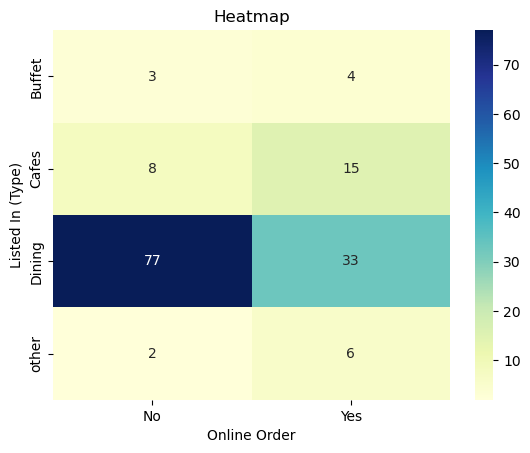

In [71]:
pivot_table= dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
pit.title("Heatmap")
pit.xlabel("Online Order")
pit.ylabel("Listed In (Type)")
pit.show()
